In [1]:
# K-means Clustering
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv', index_col = 0, header = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
df.describe(include = 'all')

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [4]:
X = df.values[:,[2,3]]

In [5]:
print(X)

[[15 39]
 [15 81]
 [16 6]
 [16 77]
 [17 40]
 [17 76]
 [18 6]
 [18 94]
 [19 3]
 [19 72]
 [19 14]
 [19 99]
 [20 15]
 [20 77]
 [20 13]
 [20 79]
 [21 35]
 [21 66]
 [23 29]
 [23 98]
 [24 35]
 [24 73]
 [25 5]
 [25 73]
 [28 14]
 [28 82]
 [28 32]
 [28 61]
 [29 31]
 [29 87]
 [30 4]
 [30 73]
 [33 4]
 [33 92]
 [33 14]
 [33 81]
 [34 17]
 [34 73]
 [37 26]
 [37 75]
 [38 35]
 [38 92]
 [39 36]
 [39 61]
 [39 28]
 [39 65]
 [40 55]
 [40 47]
 [40 42]
 [40 42]
 [42 52]
 [42 60]
 [43 54]
 [43 60]
 [43 45]
 [43 41]
 [44 50]
 [44 46]
 [46 51]
 [46 46]
 [46 56]
 [46 55]
 [47 52]
 [47 59]
 [48 51]
 [48 59]
 [48 50]
 [48 48]
 [48 59]
 [48 47]
 [49 55]
 [49 42]
 [50 49]
 [50 56]
 [54 47]
 [54 54]
 [54 53]
 [54 48]
 [54 52]
 [54 42]
 [54 51]
 [54 55]
 [54 41]
 [54 44]
 [54 57]
 [54 46]
 [57 58]
 [57 55]
 [58 60]
 [58 46]
 [59 55]
 [59 41]
 [60 49]
 [60 40]
 [60 42]
 [60 52]
 [60 47]
 [60 50]
 [61 42]
 [61 49]
 [62 41]
 [62 48]
 [62 59]
 [62 55]
 [62 56]
 [62 42]
 [63 50]
 [63 46]
 [63 43]
 [63 48]
 [63 52]
 [63 54

In [6]:
# Using the Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

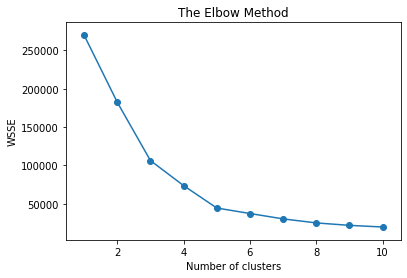

Wall time: 1.11 s


In [7]:
%%time

wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.scatter(range(1,11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [8]:
print(wsse)

[269981.28, 182440.3076298701, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30273.394312070042, 25007.383947312057, 21826.936303231654, 19669.710998301216]


In [9]:
# Fitting K-means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [10]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [11]:
kmeans.n_iter_

3

In [12]:
df['Clusters']= Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


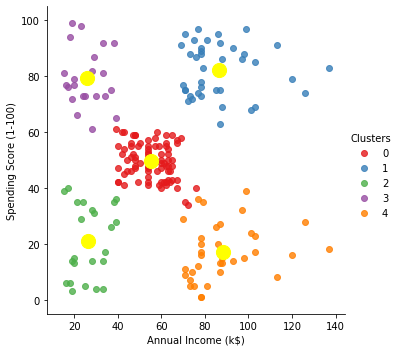

In [13]:
sns.lmplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          fit_reg = False, # No regression line
          hue = 'Clusters', palette = 'Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 200, c = 'yellow')
plt.show()

In [14]:
print(kmeans.cluster_centers_[:,0])
print(kmeans.cluster_centers_[:,1])

[55.2962963  86.53846154 26.30434783 25.72727273 88.2       ]
[49.51851852 82.12820513 20.91304348 79.36363636 17.11428571]


In [15]:
df['Clusters']= df.Clusters.map({0:'Standard',1:'Target',2:'Sensible',3:'Careless',4:'Carefull'})

In [16]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible
...,...,...,...,...,...
196,Female,35,120,79,Target
197,Female,45,126,28,Carefull
198,Male,32,126,74,Target
